In [1]:
from import_summary import *
from utility import * # 計算基底に関する確率分布を表示
from HHL_function import * # 計算基底に関する確率分布を表示

In [2]:
# 設定
np.set_printoptions(linewidth=200)

# 各パラメータ
# \dot{y}=Ay+bの、特にA,x,bがscalarの場合を考える
A = -2 # \dot{y}=-2y+3
b = 3
h = 0.05 # 刻み幅
n = 200 # 考える区間[x_first, x_first + h*(n-1)]

y_first = 1 # 初期値y(0)
scale_fac = 1.0

# 位相推定に使うレジスタの数
reg_nbit = 11

# 区間[0,h(n-1)]と厳密解
x_list = np.array([h*i for i in range(n)])
y_exact = -np.exp(-2*x_list)/2+3.0/2

In [3]:
###################### euler法専用 ######################
# Wx=cに直す
W_euler = np.zeros((n, n))
b_vec_euler = np.zeros(n)

for i in range(n):
    W_euler[i][i] = 1

for i in range(n-1):
    W_euler[i+1][i] = -A*h-1
    
b_vec_euler[0] = y_first
for i in range(1, n):
    b_vec_euler[i] = h*b

# Wは必ずHermiteではないので[[0,W],[W^T,0]]、[b,0]にする
dim = 2*n
W_euler = np.block([[np.zeros((n, n)), W_euler],[W_euler.T, np.zeros((n, n))]]) # 2n*2n次元の行列
b_vec_euler = np.block([b_vec_euler, np.zeros(n)]) # 2n次元のベクトル

###################### euler法専用 ######################

## Wの固有値を確認 -> [-pi, pi] に収まっている
eigenvalue_euler = np.linalg.eigh(W_euler)[0]
for value in eigenvalue_euler:
    if value < -np.pi or np.pi < value:
        print("caution:eigenvalues exist that are not included in [-π,π].")
        exit(1)


In [4]:
###################### Runge-kutta法(2次)専用 ######################
# Wx=cに直す
W_runge2 = np.zeros((n, n))
b_vec_runge2 = np.zeros(n)

for i in range(n):
    W_runge2[i][i] = 1

for i in range(n-1):
    W_runge2[i+1][i] = -(h**2*A**2/2 + h*A + 1)
    
b_vec_runge2[0] = y_first
for i in range(1, n):
    b_vec_runge2[i] = h*b*(h*A/2 + 1)

# Wは必ずHermiteではないので[[0,W],[W^T,0]]、[b,0]にする
dim = 2*n
W_runge2 = np.block([[np.zeros((n, n)), W_runge2],[W_runge2.T, np.zeros((n, n))]]) # 2n*2n次元の行列
b_vec_runge2 = np.block([b_vec_runge2, np.zeros(n)]) # 2n次元のベクトル

###################### Runge-kutta法(2次)専用 ######################

## Wの固有値を確認 -> [-pi, pi] に収まっている
eigenvalue_runge2 = np.linalg.eigh(W_runge2)[0]
for value in eigenvalue_runge2:
    if value < -np.pi or np.pi < value:
        print("caution:eigenvalues exist that are not included in [-π,π].")
        exit(1)


In [5]:
###################### Runge-kutta法(4次)専用 ######################
# Wx=cに直す
W_runge4 = np.zeros((n, n))
b_vec_runge4 = np.zeros(n)

for i in range(n):
    W_runge4[i][i] = 1

for i in range(n-1):
    W_runge4[i+1][i] = -(h**4*A**4/24 + h**3*A**3/6 + h**2*A**2/2 + h*A + 1)
    
b_vec_runge4[0] = y_first
for i in range(1, n):
    b_vec_runge4[i] = h**4*b*A**3/24 + h**3*b*A**2/6 + h**2*b*A/2 + b*h

# Wは必ずHermiteではないので[[0,W],[W^T,0]]、[b,0]にする
dim = 2*n
W_runge4 = np.block([[np.zeros((n, n)), W_runge4],[W_runge4.T, np.zeros((n, n))]]) # 2n*2n次元の行列
b_vec_runge4 = np.block([b_vec_runge4, np.zeros(n)]) # 2n次元のベクトル

###################### Runge-kutta法(4次)専用 ######################

## Wの固有値を確認 -> [-pi, pi] に収まっている
eigenvalue_runge4 = np.linalg.eigh(W_runge4)[0]
for value in eigenvalue_runge4:
    if value < -np.pi or np.pi < value:
        print("caution:eigenvalues exist that are not included in [-π,π].")
        exit(1)


In [6]:
start = time.time()
y_HHL_euler = HHL_algorithm(W_euler, b_vec_euler, dim, reg_nbit, scale_fac)
t = time.time() - start

# 厳密解
y_exact_euler = np.linalg.lstsq(W_euler, b_vec_euler, rcond=0)[0]

# 切り抜き
y_HHL_euler = y_HHL_euler[n:2*n]
y_exact_euler = y_exact_euler[n:2*n]

print("Elapsed time[s]:", t)
print("method:euler method")
print("register qubits:", reg_nbit)
print("h:", h,"n:", n)
rel_error = np.linalg.norm(y_HHL_euler- y_exact_euler) / np.linalg.norm(y_exact_euler)
print("rel_error", rel_error)

Elapsed time[s]: 25.58720827102661
method:euler method
register qubits: 9
h: 0.1 n: 100
rel_error 0.003033047317283904


In [7]:
start = time.time()
y_HHL_runge2 = HHL_algorithm(W_runge2, b_vec_runge2, dim, reg_nbit, scale_fac)
t = time.time() - start

# 厳密解
y_exact_runge2 = np.linalg.lstsq(W_runge2, b_vec_runge2, rcond=0)[0]

# 切り抜き
y_HHL_runge2 = y_HHL_runge2[n:2*n]
y_exact_runge2 = y_exact_runge2[n:2*n]

print("Elapsed time[s]:", t)
print("method:Runge-Kutta method(second order)")
print("register qubits:", reg_nbit)
print("h:", h,"n:", n)
rel_error = np.linalg.norm(y_HHL_runge2 - y_exact_runge2) / np.linalg.norm(y_exact_runge2)
print("rel_error", rel_error)

Elapsed time[s]: 21.94257879257202
method:Runge-Kutta method(second order)
register qubits: 9
h: 0.1 n: 100
rel_error 0.009138187269174319


In [8]:
start = time.time()
y_HHL_runge4 = HHL_algorithm(W_runge4, b_vec_runge4, dim, reg_nbit, scale_fac)
t = time.time() - start

# 厳密解
y_exact_runge4 = np.linalg.lstsq(W_runge4, b_vec_runge4, rcond=0)[0]

# 切り抜き
y_HHL_runge4 = y_HHL_runge4[n:2*n]
y_exact_runge4 = y_exact_runge4[n:2*n]

rel_error = np.linalg.norm(y_HHL_runge4 - y_exact_runge4) / np.linalg.norm(y_exact_runge4)

print("Elapsed time[s]:", t)
print("method:Runge-Kutta method(fourth order)")
print("register qubits:", reg_nbit)
print("h:", h,"n:", n)
print("rel_error", rel_error)

Elapsed time[s]: 27.05018401145935
method:Runge-Kutta method(fourth order)
register qubits: 9
h: 0.1 n: 100
rel_error 0.004833212377328972


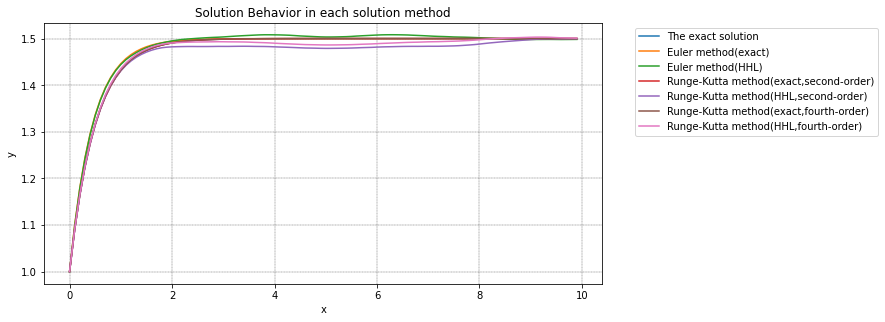

In [9]:
fig = plt.figure(figsize=(10,4.8))
plt.plot(x_list, y_exact, label="The exact solution")  # 厳密解をプロット

plt.plot(x_list, y_exact_euler, label="Euler method(exact)")  # オイラー法(厳密)で求めた近似解をプロット
plt.plot(x_list, y_HHL_euler, label="Euler method(HHL)")  # オイラー法(HHL)で求めた近似解をプロット

plt.plot(x_list, y_exact_runge2, label="Runge-Kutta method(exact,second-order)")  # 2次のルンゲクッタ法(厳密)で求めた近似解をプロット
plt.plot(x_list, y_HHL_runge2, label="Runge-Kutta method(HHL,second-order)")  # 2次のルンゲクッタ法(HHL)で求めた近似解をプロット

plt.plot(x_list, y_exact_runge4, label="Runge-Kutta method(exact,fourth-order)")  # 4次のルンゲクッタ法(厳密)で求めた近似解をプロット
plt.plot(x_list, y_HHL_runge4, label="Runge-Kutta method(HHL,fourth-order)")  # 4次のルンゲクッタ法(HHL)で求めた近似解をプロット

plt.title("Solution Behavior in each solution method")
plt.grid(color="black", linestyle='--', linewidth=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
fig.savefig("plot(reg_qubits="+str(reg_nbit)+",h="+str(h)+",n="+str(n)+").png", bbox_inches="tight")
plt.show()


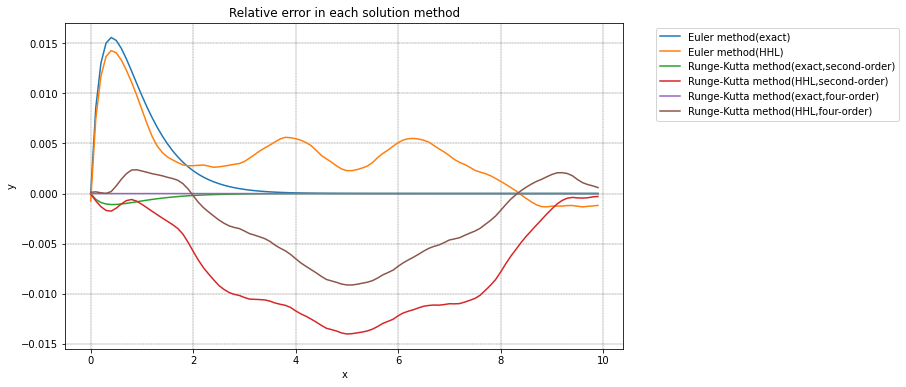

In [10]:
fig = plt.figure(figsize=(10,6))
plt.plot(x_list, (y_exact_euler-y_exact)/y_exact, label="Euler method(exact)")  # オイラー法(厳密)で求めた近似解をプロット
plt.plot(x_list, (y_HHL_euler-y_exact)/y_exact, label="Euler method(HHL)")  # オイラー法(HHL)で求めた近似解をプロット

plt.plot(x_list, (y_exact_runge2-y_exact)/y_exact, label="Runge-Kutta method(exact,second-order)")  # 2次のルンゲクッタ法(厳密)で求めた近似解をプロット
plt.plot(x_list, (y_HHL_runge2-y_exact)/y_exact, label="Runge-Kutta method(HHL,second-order)")  # 2次のルンゲクッタ法(HHL)で求めた近似解をプロット

plt.plot(x_list, (y_exact_runge4-y_exact)/y_exact, label="Runge-Kutta method(exact,four-order)")  # 2次のルンゲクッタ法(厳密)で求めた近似解をプロット
plt.plot(x_list, (y_HHL_runge4-y_exact)/y_exact, label="Runge-Kutta method(HHL,four-order)")  # 2次のルンゲクッタ法(HHL)で求めた近似解をプロット

plt.title("Relative error in each solution method")
plt.grid(color="black", linestyle='--', linewidth=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
fig.savefig("error(reg_qubits="+str(reg_nbit)+",h="+str(h)+",n="+str(n)+").png", bbox_inches="tight")
plt.show()